# Using LIME to explain the Personality Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

# Show all columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
df = pd.read_csv('data_treated/ml_pers_traits.csv', index_col=None)

df.drop(columns=['Unnamed: 0'], inplace=True)

print(df.shape)
df.head(2)

(137, 63)


,Gender,Age,Education_lev,fluidIQ,freq_calls,freq_Tools,freq_Finance,freq_Games,freq_Entertainment,freq_Productivity,freq_Personalization,freq_News...Magazines,freq_Unknown,freq_Photography,freq_Shopping,freq_Communication,freq_Books...Reference,freq_Travel...Local,freq_Music...Audio,freq_Medical,freq_Education,freq_Business,freq_Lifestyle,freq_Transportation,freq_Weather,freq_Sports,freq_Browser,freq_Health...Fitness,freq_Media...Video,freq_Social,freq_Comics,dur_calls,dur_Tools,dur_Finance,dur_Games,dur_Entertainment,dur_Productivity,dur_Personalization,dur_News...Magazines,dur_Unknown,dur_Photography,dur_Shopping,dur_Communication,dur_Books...Reference,dur_Travel...Local,dur_Music...Audio,dur_Medical,dur_Education,dur_Business,dur_Lifestyle,dur_Transportation,dur_Weather,dur_Sports,dur_Browser,dur_Health...Fitness,dur_Media...Video,dur_Social,dur_Comics,Emotional Stability,Extraversion,Openness,Conscientiousness,Agreeableness
0,1,23,4,0.7251,120,414,0,40,51,553,0,8,31,260,52,1930,3,128,113,0,11,1,7,153,0,184,231,176,1,8,0,80.508333,19.989234,0.0,474.149741,66.142812,27.299807,0.0,63.482948,5.594866,22.306456,62.541808,60.222363,102.0,66.640780,19.273367,0.0,35.316076,4.000000,60.666667,55.469027,0.0,124.447371,72.502856,125.382997,140.0,0.000000,0.0,0,0,0,0,0
1,1,21,4,0.9921,98,239,3,0,21,88,0,4,42,113,23,3430,5,19,4,0,0,7,0,34,0,0,187,0,1,211,0,176.214286,21.201236,77.0,0.000000,292.695366,29.823646,0.0,0.000000,2.149066,16.753147,90.804380,42.197411,52.0,53.702947,0.000000,0.0,0.000000,24.285714,0.000000,74.587645,0.0,0.000000,95.829110,0.000000,0.0,82.581954,0.0,1,0,1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 63 columns):
Gender                    137 non-null int64
Age                       137 non-null int64
Education_lev             137 non-null int64
fluidIQ                   137 non-null float64
freq_calls                137 non-null int64
freq_Tools                137 non-null int64
freq_Finance              137 non-null int64
freq_Games                137 non-null int64
freq_Entertainment        137 non-null int64
freq_Productivity         137 non-null int64
freq_Personalization      137 non-null int64
freq_News...Magazines     137 non-null int64
freq_Unknown              137 non-null int64
freq_Photography          137 non-null int64
freq_Shopping             137 non-null int64
freq_Communication        137 non-null int64
freq_Books...Reference    137 non-null int64
freq_Travel...Local       137 non-null int64
freq_Music...Audio        137 non-null int64
freq_Medical              137 non-null

## Machine Learning

Build classifiers

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

#### Split data from training and test

In [5]:
np.random.seed(1)
X = df.iloc[:, :-5]
Y_all_traits = df[['Emotional Stability','Extraversion','Openness','Conscientiousness','Agreeableness']]

X_train, X_test, y_train_all_traits, y_test_all_traits = train_test_split(X, Y_all_traits, test_size=0.25, random_state = 74)

In [6]:
X_train.to_csv('data_splitted/ml_X_train.csv')
X_test.to_csv('data_splitted/ml_X_test.csv')

y_train_all_traits.to_csv('data_splitted/ml_y_all_traits_train.csv')
y_test_all_traits.to_csv('data_splitted/ml_y_all_traits_test.csv')

print(X_train.shape)
print(X_test.shape)
# All five traits targets
print(y_train_all_traits.shape)
print(y_test_all_traits.shape)

(102, 58)
(35, 58)
(102, 5)
(35, 5)


In [7]:
X_test.head(2)

,Gender,Age,Education_lev,fluidIQ,freq_calls,freq_Tools,freq_Finance,freq_Games,freq_Entertainment,freq_Productivity,freq_Personalization,freq_News...Magazines,freq_Unknown,freq_Photography,freq_Shopping,freq_Communication,freq_Books...Reference,freq_Travel...Local,freq_Music...Audio,freq_Medical,freq_Education,freq_Business,freq_Lifestyle,freq_Transportation,freq_Weather,freq_Sports,freq_Browser,freq_Health...Fitness,freq_Media...Video,freq_Social,freq_Comics,dur_calls,dur_Tools,dur_Finance,dur_Games,dur_Entertainment,dur_Productivity,dur_Personalization,dur_News...Magazines,dur_Unknown,dur_Photography,dur_Shopping,dur_Communication,dur_Books...Reference,dur_Travel...Local,dur_Music...Audio,dur_Medical,dur_Education,dur_Business,dur_Lifestyle,dur_Transportation,dur_Weather,dur_Sports,dur_Browser,dur_Health...Fitness,dur_Media...Video,dur_Social,dur_Comics
82,1,21,4,0.7566,28,293,6,199,17,281,0,0,19,385,80,4621,143,66,39,0,33,22,0,105,13,0,727,0,9,1659,0,12.071429,13.04421,37.000000,188.938817,276.625000,19.024673,0.0,0.0,3.147828,24.344433,50.906274,32.099305,193.623821,51.18379,15.122307,0.000000,11.257627,97.419155,0.0,36.784020,6.537799,0.0,97.616783,0.000000,1352.464837,134.498118,0.0
120,2,19,4,0.9547,627,1137,359,519,98,256,0,21,763,507,111,6092,43,47,87,35,4,112,10,210,0,0,659,9,17,2080,0,113.188198,3.25892,22.178779,118.901203,89.539916,12.346919,0.0,2.0,2.118835,6.469082,45.320600,19.674302,38.923613,53.46144,10.285218,3.660747,5.970033,24.288840,70.8,37.667244,0.000000,0.0,59.398911,12.616721,39.400000,101.118181,0.0


#### Setup and train the classifiers  for LR, SVM, KNN, LDA and RF

Logistic Regression

In [8]:
# ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
# The default is 100 max interations, we changed to 2000 


# Setup classifiers architecture for ('Emotional Stability','Extraversion','Openness','Conscientiousness','Agreeableness')
lr_clf_esta = LogisticRegression(random_state=0, C=0.001,max_iter=2000, solver='lbfgs', multi_class='multinomial')
lr_clf_extr = LogisticRegression(random_state=0, C=0.001,max_iter=2000, solver='lbfgs', multi_class='multinomial')
lr_clf_open = LogisticRegression(random_state=0, C=0.001,max_iter=2000, solver='lbfgs', multi_class='multinomial')
lr_clf_consc = LogisticRegression(random_state=0, C=0.001,max_iter=2000, solver='lbfgs', multi_class='multinomial')
lr_clf_agr = LogisticRegression(random_state=0, C=0.001,max_iter=2000, solver='lbfgs', multi_class='multinomial')

from sklearn.externals import joblib
# Train the classifiers and save them
lr_clf_esta = lr_clf_esta.fit(X_train,y_train_all_traits['Emotional Stability'])
joblib.dump(lr_clf_esta, 'classifiers/logistic_regression_emotional_stability.pkl')
print('1...',end=' ')
lr_clf_extr = lr_clf_extr.fit(X_train,y_train_all_traits['Extraversion'])
joblib.dump(lr_clf_extr, 'classifiers/logistic_regression_extraversion.pkl') 
print('2...',end=' ')
lr_clf_open = lr_clf_open.fit(X_train,y_train_all_traits['Openness'])
joblib.dump(lr_clf_open, 'classifiers/logistic_regression_openness.pkl') 
print('3...',end=' ')
lr_clf_consc = lr_clf_consc.fit(X_train,y_train_all_traits['Conscientiousness'])
joblib.dump(lr_clf_consc, 'classifiers/logistic_regression_conscientiousness.pkl') 
print('4...',end=' ')
lr_clf_agr = lr_clf_agr.fit(X_train,y_train_all_traits['Agreeableness'])
joblib.dump(lr_clf_agr, 'classifiers/logistic_regression_agreeableness.pkl') 
print('5')

# Test the model
y_pred_esta = lr_clf_esta.predict(X_test)
y_pred_extr = lr_clf_extr.predict(X_test)
y_pred_open = lr_clf_open.predict(X_test)
y_pred_consc = lr_clf_consc.predict(X_test)
y_pred_agr = lr_clf_agr.predict(X_test)

# Predicted Values
print('Emotional Stability:', y_pred_esta)
print('Extraversion:', y_pred_extr)
print('Openness:', y_pred_open)
print('Conscientiousness:', y_pred_consc)
print('Agreeableness:', y_pred_agr)
print()
# Save predictions
df_predicted = pd.DataFrame()
df_predicted['instance'] = X_test.index
df_predicted['Emotional Stability'] = pd.Series(y_pred_esta)
df_predicted['Extraversion'] = pd.Series(y_pred_extr)
df_predicted['Openness'] = pd.Series(y_pred_open)
df_predicted['Conscientiousness'] = pd.Series(y_pred_consc)
df_predicted['Agreeableness'] = pd.Series(y_pred_agr)
df_predicted.to_csv('results/classification_results/lr_predictions.csv')

# Get the accuracy
lr_clf_accuracy_esta = accuracy_score(y_test_all_traits['Emotional Stability'], y_pred_esta)
lr_clf_accuracy_extr = accuracy_score(y_test_all_traits['Extraversion'], y_pred_extr)
lr_clf_accuracy_open = accuracy_score(y_test_all_traits['Openness'], y_pred_open)
lr_clf_accuracy_consc = accuracy_score(y_test_all_traits['Conscientiousness'], y_pred_consc)
lr_clf_accuracy_agr = accuracy_score(y_test_all_traits['Agreeableness'], y_pred_agr)
print('Accuracy Emotional Stability:', lr_clf_accuracy_esta)
print('Accuracy Extraversion:', lr_clf_accuracy_extr)
print('Accuracy Openness:', lr_clf_accuracy_open)
print('Accuracy Conscientiousness:', lr_clf_accuracy_consc)
print('Accuracy Agreeableness:', lr_clf_accuracy_agr)

# LIME requires class probabilities in case of classification example
# Get probability estimates.
lr_clf_proba_esta = lambda x: lr_clf_esta.predict_proba(x).astype(float)
lr_clf_proba_extr = lambda x: lr_clf_extr.predict_proba(x).astype(float)
lr_clf_proba_open = lambda x: lr_clf_open.predict_proba(x).astype(float)
lr_clf_proba_consc = lambda x: lr_clf_consc.predict_proba(x).astype(float)
lr_clf_proba_agr = lambda x: lr_clf_agr.predict_proba(x).astype(float)

/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1... 

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


2... 3... 4... 5
Emotional Stability: [0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1]
Extraversion: [0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0]
Openness: [1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0]
Conscientiousness: [1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1]
Agreeableness: [1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0]

Accuracy Emotional Stability: 0.4857142857142857
Accuracy Extraversion: 0.6285714285714286
Accuracy Openness: 0.6857142857142857
Accuracy Conscientiousness: 0.5714285714285714
Accuracy Agreeableness: 0.6285714285714286


Support Vector Machine

In [9]:
# Setup classifiers architecture for ('Emotional Stability','Extraversion','Openness','Conscientiousness','Agreeableness')
svm_clf_esta = SVC(kernel='poly', degree=2, gamma='auto', probability=True)
svm_clf_extr = SVC(kernel='poly', degree=3, gamma='auto', probability=True)
svm_clf_open = SVC(kernel='poly', degree=3, gamma='auto', probability=True)
svm_clf_consc = SVC(kernel='poly', degree=4, gamma='auto', probability=True)
svm_clf_agr = SVC(kernel='poly', degree=4, gamma='auto', probability=True)

from sklearn.externals import joblib
# Train the classifiers and save them
svm_clf_esta = svm_clf_esta.fit(X_train,y_train_all_traits['Emotional Stability'])
joblib.dump(svm_clf_esta, 'classifiers/svm_emotional_stability.pkl')
print('1...',end=' ')
svm_clf_extr = svm_clf_extr.fit(X_train,y_train_all_traits['Extraversion'])
joblib.dump(svm_clf_extr, 'classifiers/svm_extraversion.pkl') 
print('2...',end=' ')
svm_clf_open = svm_clf_open.fit(X_train,y_train_all_traits['Openness'])
joblib.dump(svm_clf_open, 'classifiers/svm_openness.pkl') 
print('3...',end=' ')
svm_clf_consc = svm_clf_consc.fit(X_train,y_train_all_traits['Conscientiousness'])
joblib.dump(svm_clf_consc, 'classifiers/svm_conscientiousness.pkl') 
print('4...',end=' ')
svm_clf_agr = svm_clf_agr.fit(X_train,y_train_all_traits['Agreeableness'])
joblib.dump(svm_clf_agr, 'classifiers/svm_agreeableness.pkl') 
print('5')

# Test the model
y_pred_esta = svm_clf_esta.predict(X_test)
y_pred_extr = svm_clf_extr.predict(X_test)
y_pred_open = svm_clf_open.predict(X_test)
y_pred_consc = svm_clf_consc.predict(X_test)
y_pred_agr = svm_clf_agr.predict(X_test)

# Predicted Values
print('Emotional Stability:', y_pred_esta)
print('Extraversion:', y_pred_extr)
print('Openness:', y_pred_open)
print('Conscientiousness:', y_pred_consc)
print('Agreeableness:', y_pred_agr)
print()
# Save predictions
df_predicted = pd.DataFrame()
df_predicted['instance'] = X_test.index
df_predicted['Emotional Stability'] = pd.Series(y_pred_esta)
df_predicted['Extraversion'] = pd.Series(y_pred_extr)
df_predicted['Openness'] = pd.Series(y_pred_open)
df_predicted['Conscientiousness'] = pd.Series(y_pred_consc)
df_predicted['Agreeableness'] = pd.Series(y_pred_agr)
df_predicted.to_csv('results/classification_results/svm_predictions.csv')

# Get the accuracy
svm_clf_accuracy_esta = accuracy_score(y_test_all_traits['Emotional Stability'], y_pred_esta)
svm_clf_accuracy_extr = accuracy_score(y_test_all_traits['Extraversion'], y_pred_extr)
svm_clf_accuracy_open = accuracy_score(y_test_all_traits['Openness'], y_pred_open)
svm_clf_accuracy_consc = accuracy_score(y_test_all_traits['Conscientiousness'], y_pred_consc)
svm_clf_accuracy_agr = accuracy_score(y_test_all_traits['Agreeableness'], y_pred_agr)
print('Accuracy Emotional Stability:', svm_clf_accuracy_esta)
print('Accuracy Extraversion:', svm_clf_accuracy_extr)
print('Accuracy Openness:', svm_clf_accuracy_open)
print('Accuracy Conscientiousness:', svm_clf_accuracy_consc)
print('Accuracy Agreeableness:', svm_clf_accuracy_agr)

# LIME requires class probabilities in case of classification example
# Get probability estimates.
svm_clf_proba_esta = lambda x: svm_clf_esta.predict_proba(x).astype(float)
svm_clf_proba_extr = lambda x: svm_clf_extr.predict_proba(x).astype(float)
svm_clf_proba_open = lambda x: svm_clf_open.predict_proba(x).astype(float)
svm_clf_proba_consc = lambda x: svm_clf_consc.predict_proba(x).astype(float)
svm_clf_proba_agr = lambda x: svm_clf_agr.predict_proba(x).astype(float)

1... 2... 3... 4... 5
Emotional Stability: [1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0]
Extraversion: [0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0]
Openness: [0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0]
Conscientiousness: [1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0]
Agreeableness: [0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0]

Accuracy Emotional Stability: 0.5142857142857142
Accuracy Extraversion: 0.6
Accuracy Openness: 0.5428571428571428
Accuracy Conscientiousness: 0.45714285714285713
Accuracy Agreeableness: 0.4857142857142857


K-nearest neighbors

In [10]:
# Setup classifiers architecture for ('Emotional Stability','Extraversion','Openness','Conscientiousness','Agreeableness')
knn_clf_esta = KNeighborsClassifier(n_neighbors=3)
knn_clf_extr = KNeighborsClassifier(n_neighbors=3)
knn_clf_open = KNeighborsClassifier(n_neighbors=3)
knn_clf_consc = KNeighborsClassifier(n_neighbors=3)
knn_clf_agr = KNeighborsClassifier(n_neighbors=3)

from sklearn.externals import joblib
# Train the classifiers and save them
knn_clf_esta = knn_clf_esta.fit(X_train,y_train_all_traits['Emotional Stability'])
joblib.dump(knn_clf_esta, 'classifiers/knn_emotional_stability.pkl')
print('1...',end=' ')
knn_clf_extr = knn_clf_extr.fit(X_train,y_train_all_traits['Extraversion'])
joblib.dump(knn_clf_extr, 'classifiers/knn_extraversion.pkl') 
print('2...',end=' ')
knn_clf_open = knn_clf_open.fit(X_train,y_train_all_traits['Openness']) 
joblib.dump(knn_clf_open, 'classifiers/knn_openness.pkl')
print('3...',end=' ')
knn_clf_consc = knn_clf_consc.fit(X_train,y_train_all_traits['Conscientiousness']) 
joblib.dump(knn_clf_consc, 'classifiers/knn_conscientiousness.pkl')
print('4...',end=' ')
knn_clf_agr = knn_clf_agr.fit(X_train,y_train_all_traits['Agreeableness']) 
joblib.dump(knn_clf_agr, 'classifiers/knn_agreeableness.pkl')
print('5')

# Test the model
y_pred_esta = knn_clf_esta.predict(X_test)
y_pred_extr = knn_clf_extr.predict(X_test)
y_pred_open = knn_clf_open.predict(X_test)
y_pred_consc = knn_clf_consc.predict(X_test)
y_pred_agr = knn_clf_agr.predict(X_test)

# Predicted Values
print('Emotional Stability:', y_pred_esta)
print('Extraversion:', y_pred_extr)
print('Openness:', y_pred_open)
print('Conscientiousness:', y_pred_consc)
print('Agreeableness:', y_pred_agr)
print()
# Save predictions
df_predicted = pd.DataFrame()
df_predicted['instance'] = X_test.index
df_predicted['Emotional Stability'] = pd.Series(y_pred_esta)
df_predicted['Extraversion'] = pd.Series(y_pred_extr)
df_predicted['Openness'] = pd.Series(y_pred_open)
df_predicted['Conscientiousness'] = pd.Series(y_pred_consc)
df_predicted['Agreeableness'] = pd.Series(y_pred_agr)
df_predicted.to_csv('results/classification_results/knn_predictions.csv')

# Get the accuracy
knn_clf_accuracy_esta = accuracy_score(y_test_all_traits['Emotional Stability'], y_pred_esta)
knn_clf_accuracy_extr = accuracy_score(y_test_all_traits['Extraversion'], y_pred_extr)
knn_clf_accuracy_open = accuracy_score(y_test_all_traits['Openness'], y_pred_open)
knn_clf_accuracy_consc = accuracy_score(y_test_all_traits['Conscientiousness'], y_pred_consc)
knn_clf_accuracy_agr = accuracy_score(y_test_all_traits['Agreeableness'], y_pred_agr)
print('Accuracy Emotional Stability:', knn_clf_accuracy_esta)
print('Accuracy Extraversion:', knn_clf_accuracy_extr)
print('Accuracy Openness:', knn_clf_accuracy_open)
print('Accuracy Conscientiousness:', knn_clf_accuracy_consc)
print('Accuracy Agreeableness:', knn_clf_accuracy_agr)

# LIME requires class probabilities in case of classification example
# Get probability estimates.
knn_clf_proba_esta = lambda x: knn_clf_esta.predict_proba(x).astype(float)
knn_clf_proba_extr = lambda x: knn_clf_extr.predict_proba(x).astype(float)
knn_clf_proba_open = lambda x: knn_clf_open.predict_proba(x).astype(float)
knn_clf_proba_consc = lambda x: knn_clf_consc.predict_proba(x).astype(float)
knn_clf_proba_agr = lambda x: knn_clf_agr.predict_proba(x).astype(float)

1... 2... 3... 4... 5
Emotional Stability: [0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
Extraversion: [0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1]
Openness: [0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1]
Conscientiousness: [1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1]
Agreeableness: [1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1]

Accuracy Emotional Stability: 0.6
Accuracy Extraversion: 0.6285714285714286
Accuracy Openness: 0.6571428571428571
Accuracy Conscientiousness: 0.6857142857142857
Accuracy Agreeableness: 0.6571428571428571


Linear Discriminant Analysis

In [11]:
# Setup classifiers architecture for ('Emotional Stability','Extraversion','Openness','Conscientiousness','Agreeableness')
lda_clf_esta = LinearDiscriminantAnalysis(solver='svd')
lda_clf_extr = LinearDiscriminantAnalysis(solver='svd')
lda_clf_open = LinearDiscriminantAnalysis(solver='svd')
lda_clf_consc = LinearDiscriminantAnalysis(solver='svd')
lda_clf_agr = LinearDiscriminantAnalysis(solver='svd')

from sklearn.externals import joblib
# Train the classifiers and save them
lda_clf_esta = lda_clf_esta.fit(X_train,y_train_all_traits['Emotional Stability'])
joblib.dump(lda_clf_esta, 'classifiers/lda_emotional_stability.pkl')
print('1...',end=' ')
lda_clf_extr = lda_clf_extr.fit(X_train,y_train_all_traits['Extraversion'])
joblib.dump(lda_clf_extr, 'classifiers/lda_extraversion.pkl') 
print('2...',end=' ')
lda_clf_open = lda_clf_open.fit(X_train,y_train_all_traits['Openness']) 
joblib.dump(lda_clf_open, 'classifiers/lda_openness.pkl')
print('3...',end=' ')
lda_clf_consc = lda_clf_consc.fit(X_train,y_train_all_traits['Conscientiousness']) 
joblib.dump(lda_clf_consc, 'classifiers/lda_conscientiousness.pkl')
print('4...',end=' ')
lda_clf_agr = lda_clf_agr.fit(X_train,y_train_all_traits['Agreeableness']) 
joblib.dump(lda_clf_agr, 'classifiers/lda_agreeableness.pkl')
print('5')

# Test the model
y_pred_esta = lda_clf_esta.predict(X_test)
y_pred_extr = lda_clf_extr.predict(X_test)
y_pred_open = lda_clf_open.predict(X_test)
y_pred_consc = lda_clf_consc.predict(X_test)
y_pred_agr = lda_clf_agr.predict(X_test)

# Predicted Values
print('Emotional Stability:', y_pred_esta)
print('Extraversion:', y_pred_extr)
print('Openness:', y_pred_open)
print('Conscientiousness:', y_pred_consc)
print('Agreeableness:', y_pred_agr)
print()
# Save predictions
df_predicted = pd.DataFrame()
df_predicted['instance'] = X_test.index
df_predicted['Emotional Stability'] = pd.Series(y_pred_esta)
df_predicted['Extraversion'] = pd.Series(y_pred_extr)
df_predicted['Openness'] = pd.Series(y_pred_open)
df_predicted['Conscientiousness'] = pd.Series(y_pred_consc)
df_predicted['Agreeableness'] = pd.Series(y_pred_agr)
df_predicted.to_csv('results/classification_results/LDA_predictions.csv')

# Get the accuracy
lda_clf_accuracy_esta = accuracy_score(y_test_all_traits['Emotional Stability'], y_pred_esta)
lda_clf_accuracy_extr = accuracy_score(y_test_all_traits['Extraversion'], y_pred_extr)
lda_clf_accuracy_open = accuracy_score(y_test_all_traits['Openness'], y_pred_open)
lda_clf_accuracy_consc = accuracy_score(y_test_all_traits['Conscientiousness'], y_pred_consc)
lda_clf_accuracy_agr = accuracy_score(y_test_all_traits['Agreeableness'], y_pred_agr)
print('Accuracy Emotional Stability:', lda_clf_accuracy_esta)
print('Accuracy Extraversion:', lda_clf_accuracy_extr)
print('Accuracy Openness:', lda_clf_accuracy_open)
print('Accuracy Conscientiousness:', lda_clf_accuracy_consc)
print('Accuracy Agreeableness:', lda_clf_accuracy_agr)

# LIME requires class probabilities in case of classification example
# Get probability estimates.
lda_clf_proba_esta = lambda x: lda_clf_esta.predict_proba(x).astype(float)
lda_clf_proba_extr = lambda x: lda_clf_extr.predict_proba(x).astype(float)
lda_clf_proba_open = lambda x: lda_clf_open.predict_proba(x).astype(float)
lda_clf_proba_consc = lambda x: lda_clf_consc.predict_proba(x).astype(float)
lda_clf_proba_agr = lambda x: lda_clf_agr.predict_proba(x).astype(float)

1... 2... 3... 4... 5
Emotional Stability: [1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0]
Extraversion: [0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0]
Openness: [1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0]
Conscientiousness: [1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0]
Agreeableness: [0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0]

Accuracy Emotional Stability: 0.6857142857142857
Accuracy Extraversion: 0.6
Accuracy Openness: 0.5428571428571428
Accuracy Conscientiousness: 0.34285714285714286
Accuracy Agreeableness: 0.6


Random Forest

In [12]:
# Setup classifiers architecture for ('Emotional Stability','Extraversion','Openness','Conscientiousness','Agreeableness')
rf_clf_esta = RandomForestClassifier(n_estimators=64, random_state=1)
rf_clf_extr = RandomForestClassifier(n_estimators=64, random_state=2)
rf_clf_open = RandomForestClassifier(n_estimators=64, random_state=10)
rf_clf_consc = RandomForestClassifier(n_estimators=64, random_state=11)
rf_clf_agr = RandomForestClassifier(n_estimators=64, random_state=8)

from sklearn.externals import joblib
# Train the classifiers and save them
rf_clf_esta = rf_clf_esta.fit(X_train,y_train_all_traits['Emotional Stability'])
joblib.dump(rf_clf_esta, 'classifiers/rf_emotional_stability.pkl')
print('1...',end=' ')
rf_clf_extr = rf_clf_extr.fit(X_train,y_train_all_traits['Extraversion'])
joblib.dump(rf_clf_extr, 'classifiers/rf_extraversion.pkl') 
print('2...',end=' ')
rf_clf_open = rf_clf_open.fit(X_train,y_train_all_traits['Openness']) 
joblib.dump(rf_clf_open, 'classifiers/rf_openness.pkl')
print('3...',end=' ')
rf_clf_consc = rf_clf_consc.fit(X_train,y_train_all_traits['Conscientiousness']) 
joblib.dump(rf_clf_consc, 'classifiers/rf_conscientiousness.pkl')
print('4...',end=' ')
rf_clf_agr = rf_clf_agr.fit(X_train,y_train_all_traits['Agreeableness']) 
joblib.dump(rf_clf_agr, 'classifiers/rf_agreeableness.pkl')
print('5')

# Test the model
y_pred_esta = rf_clf_esta.predict(X_test)
y_pred_extr = rf_clf_extr.predict(X_test)
y_pred_open = rf_clf_open.predict(X_test)
y_pred_consc = rf_clf_consc.predict(X_test)
y_pred_agr = rf_clf_agr.predict(X_test)

# Predicted Values
print('Emotional Stability:', y_pred_esta)
print('Extraversion:', y_pred_extr)
print('Openness:', y_pred_open)
print('Conscientiousness:', y_pred_consc)
print('Agreeableness:', y_pred_agr)
print()
# Save predictions
df_predicted = pd.DataFrame()
df_predicted['instance'] = X_test.index
df_predicted['Emotional Stability'] = pd.Series(y_pred_esta)
df_predicted['Extraversion'] = pd.Series(y_pred_extr)
df_predicted['Openness'] = pd.Series(y_pred_open)
df_predicted['Conscientiousness'] = pd.Series(y_pred_consc)
df_predicted['Agreeableness'] = pd.Series(y_pred_agr)
df_predicted.to_csv('results/classification_results/RFC_predictions.csv')

# Get the accuracy
rf_clf_accuracy_esta = accuracy_score(y_test_all_traits['Emotional Stability'], y_pred_esta)
rf_clf_accuracy_extr = accuracy_score(y_test_all_traits['Extraversion'], y_pred_extr)
rf_clf_accuracy_open = accuracy_score(y_test_all_traits['Openness'], y_pred_open)
rf_clf_accuracy_consc = accuracy_score(y_test_all_traits['Conscientiousness'], y_pred_consc)
rf_clf_accuracy_agr = accuracy_score(y_test_all_traits['Agreeableness'], y_pred_agr)
print('Accuracy Emotional Stability:', rf_clf_accuracy_esta)
print('Accuracy Extraversion:', rf_clf_accuracy_extr)
print('Accuracy Openness:', rf_clf_accuracy_open)
print('Accuracy Conscientiousness:', rf_clf_accuracy_consc)
print('Accuracy Agreeableness:', rf_clf_accuracy_agr)

# LIME requires class probabilities in case of classification example
# Get probability estimates.
rf_clf_proba_esta = lambda x: rf_clf_esta.predict_proba(x).astype(float)
rf_clf_proba_extr = lambda x: rf_clf_extr.predict_proba(x).astype(float)
rf_clf_proba_open = lambda x: rf_clf_open.predict_proba(x).astype(float)
rf_clf_proba_consc = lambda x: rf_clf_consc.predict_proba(x).astype(float)
rf_clf_proba_agr = lambda x: rf_clf_agr.predict_proba(x).astype(float)

1... 2... 3... 4... 5
Emotional Stability: [0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1]
Extraversion: [1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0]
Openness: [0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0]
Conscientiousness: [0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1]
Agreeableness: [1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0]

Accuracy Emotional Stability: 0.6285714285714286
Accuracy Extraversion: 0.6285714285714286
Accuracy Openness: 0.7428571428571429
Accuracy Conscientiousness: 0.6285714285714286
Accuracy Agreeableness: 0.5714285714285714


#### Save Classifiers

In [13]:
from sklearn.externals import joblib

In [14]:
# Save Logistic Regression Classifiers
joblib.dump(lr_clf_esta, 'classifiers/logistic_regression_emotional_stability.pkl')
joblib.dump(lr_clf_extr, 'classifiers/logistic_regression_extraversion.pkl') 
joblib.dump(lr_clf_open, 'classifiers/logistic_regression_openness.pkl') 
joblib.dump(lr_clf_consc, 'classifiers/logistic_regression_conscientiousness.pkl') 
joblib.dump(lr_clf_agr, 'classifiers/logistic_regression_agreeableness.pkl') 

# Load Classifier
#clf = joblib.load('classifiers/logistic_regression_emotional_stability.pkl')

['classifiers/logistic_regression_agreeableness.pkl']

In [15]:
# Save Support Vector Classifiers
joblib.dump(svm_clf_esta, 'classifiers/svm_emotional_stability.pkl')
joblib.dump(svm_clf_extr, 'classifiers/svm_extraversion.pkl') 
joblib.dump(svm_clf_open, 'classifiers/svm_openness.pkl') 
joblib.dump(svm_clf_consc, 'classifiers/svm_conscientiousness.pkl') 
joblib.dump(svm_clf_agr, 'classifiers/svm_agreeableness.pkl') 

['classifiers/svm_agreeableness.pkl']

In [16]:
# Save KNN Classifiers
joblib.dump(knn_clf_esta, 'classifiers/knn_emotional_stability.pkl')
joblib.dump(knn_clf_extr, 'classifiers/knn_extraversion.pkl') 
joblib.dump(knn_clf_open, 'classifiers/knn_openness.pkl') 
joblib.dump(knn_clf_consc, 'classifiers/knn_conscientiousness.pkl') 
joblib.dump(knn_clf_agr, 'classifiers/knn_agreeableness.pkl') 

['classifiers/knn_agreeableness.pkl']

In [17]:
# Save Linear Discriminant Analysis Classifiers
joblib.dump(lda_clf_esta, 'classifiers/lda_emotional_stability.pkl')
joblib.dump(lda_clf_extr, 'classifiers/lda_extraversion.pkl') 
joblib.dump(lda_clf_open, 'classifiers/lda_openness.pkl') 
joblib.dump(lda_clf_consc, 'classifiers/lda_conscientiousness.pkl') 
joblib.dump(lda_clf_agr, 'classifiers/lda_agreeableness.pkl') 

['classifiers/lda_agreeableness.pkl']

In [18]:
# Save Random Forest Classifiers
joblib.dump(rf_clf_esta, 'classifiers/rf_emotional_stability.pkl')
joblib.dump(rf_clf_extr, 'classifiers/rf_extraversion.pkl') 
joblib.dump(rf_clf_open, 'classifiers/rf_openness.pkl') 
joblib.dump(rf_clf_consc, 'classifiers/rf_conscientiousness.pkl') 
joblib.dump(rf_clf_agr, 'classifiers/rf_agreeableness.pkl') 

['classifiers/rf_agreeableness.pkl']

# Explainable AI - LIME

In [19]:
# LIME works for different types of data such as text, images, categorical, numerical, ...
import lime
import lime.lime_tabular

### Setup the explainer (independent from the classifier, just required information about the training data)

In [20]:
training_data = X_train.values # to 2d numpy
feature_names = X_train.columns.values
categorical_features = [0,2]
categorical_names = ['Gender','Education_lev']

In [21]:
# Create the explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=training_data, # convert from pandas DataFrame to numpy 2d array
    mode='classification',
    feature_names=feature_names, # All columns name
    categorical_features=categorical_features, # Index of categorical features (int)
    categorical_names= categorical_names, 
    # class_names=class_names, # classes (0 and 1)
    class_names=['low', 'high'],
    discretize_continuous=True
)

### Explain the result for an instance of the testing data in GUI mode

In [22]:
testing_data = X_test.values # to 2d numpy

# Explain an instance
np.random.seed(1)
i = 5
exp = explainer.explain_instance(
    testing_data[i],
    lr_clf_proba_extr, 
    num_features=10,
    num_samples=10000, # size of the neighborhood to learn the linear model,
    distance_metric='euclidean',
    model_regressor=None
)
exp.show_in_notebook(show_table=True, show_all=False)

In [23]:
print(exp.predict_proba)
exp.as_list()

[0.22136075 0.77863925]


[('dur_Shopping <= 0.00', -0.21494291805227464),
 ('freq_Medical <= 0.00', -0.13708467600264349),
 ('dur_Personalization <= 0.00', 0.135608777439927),
 ('dur_calls > 117.70', -0.13208998027608024),
 ('dur_Health...Fitness > 26.54', 0.1161605660976115),
 ('freq_News...Magazines > 50.75', -0.09148233980564204),
 ('98.75 < freq_calls <= 175.00', -0.08035869964722848),
 ('dur_Entertainment > 121.90', -0.07712864040592217),
 ('dur_Sports <= 0.00', 0.06634710013411665),
 ('freq_Business <= 1.00', 0.061631276064819114)]

### Explain for all instances of testing data and save on a csv file

Our object is geting all the 5 features that most contributed to the decision as well as the one that most positive and negative influenced the decision for each instance of the testing data. We also get the prediction probabilities. The output is saved on csv files by classifier and trait

In [24]:
# Explain all instance
def extract_token(explanation_feature):
    # explanation_feature (string) - (e.g., 'freq_Shopping > 17.75')
    # Check if the value is a number, since sometimes the conditions is like: 24.99 < dur_calls <= 59.81
    # Instead of 24.99 < dur_calls
    # Extract the right token
    
    feature = explanation_feature.split(' ')
    
    # solve this issue - 'Education_lev=3' -> return Education_lev
    if '=' in feature[0]:
        return feature[0].split('=')[0]
        
    try: 
        int(feature[0]) # is a number
        return feature[2]
    except ValueError:
        if any(str.isdigit(c) for c in feature[0]):
            return feature[2]
        else:
            return feature[0]
        

def explain_all_instances(df, testing_data, classifier_proba):  
    np.random.seed(1)
    print('Total ' + str(len(testing_data)) + ' [', end = '')
    
    num_features = 20
    
    for instance in range(len(testing_data)):
               
        features = []
        
        print(str(instance), end = ' ')
        exp = explainer.explain_instance(
            testing_data[instance],
            classifier_proba, 
            num_features=num_features, # Rise this value if it does not encounter a value that contributes to be positive or negative
            num_samples=10000, # size of the neighborhood to learn the linear model,
            distance_metric='euclidean',
            model_regressor=None
        )
        
        # Save probabilities
        proba = exp.predict_proba
        df.loc[df['index'] == instance,'low_prob'] = proba[0]
        df.loc[df['index'] == instance,'high_prob'] = proba[1]
        
        #print(exp.show_in_notebook(show_table=True, show_all=False))
        #exp.as_html('results/extroverted/instance-' + str(i) + '.html')
        exp_res = exp.as_list()
        
        # EXEMPLE OUTPUT OF exp_res
        #[('dur_calls > 130.96', -0.3301713358748256),
        #('dur_Shopping <= 0.00', -0.23895139664004045),
        #('freq_Shopping <= 0.00', 0.19739928890647732),
        #('dur_Sports <= 0.00', 0.1435479064088512),
        #('dur_Lifestyle <= 0.00', -0.10569875594553718)]
        
        for index in range(num_features):
            features.append(extract_token(exp_res[index][0])) 
        
        df.loc[df['index'] == instance,'most_contribute_1'] = features[0]
        df.loc[df['index'] == instance,'most_contribute_2'] = features[1]
        df.loc[df['index'] == instance,'most_contribute_3'] = features[2]
        df.loc[df['index'] == instance,'most_contribute_4'] = features[3]
        df.loc[df['index'] == instance,'most_contribute_5'] = features[4]
        
        most_contribure_low = False
        most_contribure_high = False
        
        for index in range(num_features):
            
            if most_contribure_low and most_contribure_high:
                break
            
            value = float(exp_res[index][1])
            positive_signal = value >= 0
            #print(value, '-', positive_signal, end= ' ')
            
            if positive_signal == False and most_contribure_low == False:
                most_contribure_low = True
                df.loc[df['index'] == instance,'most_contribute_to_low'] = features[index]
            elif positive_signal == True and most_contribure_high == False:
                most_contribure_high = True
                df.loc[df['index'] == instance,'most_contribute_to_high'] = features[index]
        
    print(']')
    
    return df

#extract_token('dur_Shopping <= 0.00')
#extract_token('0.00 < dur_Shopping')
#extract_token('0.00 < dur_Shopping < 10')

### Explain each Trait for Logistic Regression Models

In [ ]:
# Run for ('Emotional Stability','Extraversion','Openness','Conscientiousness','Agreeableness')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, lr_clf_proba_esta)
df_results.to_csv('results/lime_Emotional_stability_Logistic_Regression.csv')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, lr_clf_proba_extr)
df_results.to_csv('results/lime_Extroversion_Logistic_Regression.csv')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, lr_clf_proba_open)
df_results.to_csv('results/lime_Openness_Logistic_Regression.csv')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, lr_clf_proba_consc)
df_results.to_csv('results/lime_Conscientiousness_Logistic_Regression.csv')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, lr_clf_proba_agr)
df_results.to_csv('results/lime_Agreeableness_Logistic_Regression.csv')

### Explain each Trait for SVM Models

In [34]:
# Run for ('Emotional Stability','Extraversion','Openness','Conscientiousness','Agreeableness')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, svm_clf_proba_esta)
df_results.to_csv('results/lime_Emotional_stability_SVM.csv')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, svm_clf_proba_extr)
df_results.to_csv('results/lime_Extroversion_SVM.csv')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, svm_clf_proba_open)
df_results.to_csv('results/lime_Openness_SVM.csv')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, svm_clf_proba_consc)
df_results.to_csv('results/lime_Conscientiousness_SVM.csv')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, svm_clf_proba_agr)
df_results.to_csv('results/lime_Agreeableness_SVM.csv')

Total 35 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 ]
Total 35 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 ]
Total 35 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 ]
Total 35 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 ]
Total 35 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 ]


### Explain each Trait for KNN Models

In [35]:
# Run for ('Emotional Stability','Extraversion','Openness','Conscientiousness','Agreeableness')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, knn_clf_proba_esta)
df_results.to_csv('results/lime_Emotional_Stability_KNN.csv')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, knn_clf_proba_extr)
df_results.to_csv('results/lime_Extroversion_KNN.csv')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, knn_clf_proba_open)
df_results.to_csv('results/lime_Openness_KNN.csv')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, knn_clf_proba_consc)
df_results.to_csv('results/lime_Conscientiousness_KNN.csv')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, knn_clf_proba_agr)
df_results.to_csv('results/lime_Agreeableness_KNN.csv')

Total 35 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 ]
Total 35 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 ]
Total 35 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 ]
Total 35 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 ]
Total 35 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 ]


### Explain each Trait for LDA Models

In [127]:
# Run for ('Emotional Stability','Extraversion','Openness','Conscientiousness','Agreeableness')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, lda_clf_proba_esta)
df_results.to_csv('results/lime_Emotional_Stability_LDA.csv')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, lda_clf_proba_extr)
df_results.to_csv('results/lime_Extroversion_LDA.csv')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, lda_clf_proba_open)
df_results.to_csv('results/lime_Openness_LDA.csv')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, lda_clf_proba_consc)
df_results.to_csv('results/lime_Conscientiousness_LDA.csv')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, lda_clf_proba_agr)
df_results.to_csv('results/lime_Agreeableness_LDA.csv')

Total 35 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 ]
Total 35 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 ]
Total 35 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 ]
Total 35 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 ]
Total 35 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 ]


### Explain each Trait for RF Models

In [128]:
# Run for ('Emotional Stability','Extraversion','Openness','Conscientiousness','Agreeableness')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, rf_clf_proba_esta)
df_results.to_csv('results/lime_Emotional_Stability_RF.csv')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, rf_clf_proba_extr)
df_results.to_csv('results/lime_Extroversion_RF.csv')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, rf_clf_proba_open)
df_results.to_csv('results/lime_Openness_RF.csv')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, rf_clf_proba_consc)
df_results.to_csv('results/lime_Conscientiousness_RF.csv')

df_results = pd.read_csv('results/template/template.csv', index_col=None)
df = explain_all_instances(df_results, testing_data, rf_clf_proba_agr)
df_results.to_csv('results/lime_Agreeableness_RF.csv')

Total 35 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 ]
Total 35 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 ]
Total 35 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 ]
Total 35 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 ]
Total 35 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 ]


## Explainable AI - Random Forest

In [25]:
import seaborn as sns
sns.set(style="white")

In [26]:
importances_rf_clf = []
importances_rf_clf.append(rf_clf_esta.feature_importances_)
importances_rf_clf.append(rf_clf_extr.feature_importances_)
importances_rf_clf.append(rf_clf_open.feature_importances_)
importances_rf_clf.append(rf_clf_consc.feature_importances_)
importances_rf_clf.append(rf_clf_agr.feature_importances_)

In [27]:
print(len(X_train.columns.values))
X_train.columns.values

58


array(['Gender', 'Age', 'Education_lev', 'fluidIQ', 'freq_calls',
       'freq_Tools', 'freq_Finance', 'freq_Games', 'freq_Entertainment',
       'freq_Productivity', 'freq_Personalization',
       'freq_News...Magazines', 'freq_Unknown', 'freq_Photography',
       'freq_Shopping', 'freq_Communication', 'freq_Books...Reference',
       'freq_Travel...Local', 'freq_Music...Audio', 'freq_Medical',
       'freq_Education', 'freq_Business', 'freq_Lifestyle',
       'freq_Transportation', 'freq_Weather', 'freq_Sports',
       'freq_Browser', 'freq_Health...Fitness', 'freq_Media...Video',
       'freq_Social', 'freq_Comics', 'dur_calls', 'dur_Tools',
       'dur_Finance', 'dur_Games', 'dur_Entertainment',
       'dur_Productivity', 'dur_Personalization', 'dur_News...Magazines',
       'dur_Unknown', 'dur_Photography', 'dur_Shopping',
       'dur_Communication', 'dur_Books...Reference', 'dur_Travel...Local',
       'dur_Music...Audio', 'dur_Medical', 'dur_Education',
       'dur_Business', 'd

In [28]:
X_labels = ['Gender','Age','Education Lvl.','Fluid IQ','Freq. Calls',
            'Freq. Tools','Freq. Finance','Freq. Games', 'Freq. Entertainment',
            'Freq. Productivity','Freq. Personality',
            'Freq. News/Magazines', 'Freq. Unknown', 'Freq. Photography',
            'Freq. Shopping', 'Freq. Communication', 'Freq. Books/Reference',
            'Freq. Travel/Local', 'Freq. Music/Audio', 'Freq. Medical',
            'Freq. Education', 'Freq. Business', 'Freq. Lifestyle',
            'Freq. Transportation', 'Freq. Weather', 'Freq. Sports',
            'Freq. Browser', 'Freq. Health/Fitness', 'Freq. Media/Video',
            'Freq. Social', 'Freq. Comics', 'Dur. Calls', 'Dur. Tools',
            'Dur. Finance', 'Dur. Games', 'Dur. Entertainment',
            'Dur. Productivity', 'Dur. Personalization', 'Dur. News/Magazines',
            'Dur. Unknown', 'Dur. Photography', 'Dur. Shopping',
            'Dur. Communication', 'Dur. Books/Reference', 'Dur. Travel/Local',
            'Dur. Music/Audio', 'Dur. Medical', 'Dur. Education',
            'Dur. Business', 'Dur. Lifestyle', 'Dur. Transportation',
            'Dur. Weather', 'Dur. Sports', 'Dur. Browser', 'Dur. Health/Fitness',
            'Dur. Media/Video', 'Dur. Social', 'Dur. Comics',]
len(X_labels)

58

In [29]:
data = []
for i in range(len(importances_rf_clf)):
    data.append(pd.DataFrame(data={'Features': X_labels,'Importance': importances_rf_clf[i]}))
    data[i] = data[i].sort_values(by='Importance', ascending=False)
    data[i]['Importance'] = data[i]['Importance'].round(5)
    data[i] = data[i][0:6]
data[0].head(3)

,Features,Importance
23,Freq. Transportation,0.03858
48,Dur. Business,0.03623
13,Freq. Photography,0.03539


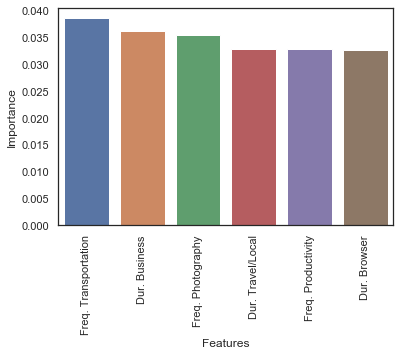

In [30]:
data_estra = data[0]
ax = sns.barplot(x="Features", y="Importance", data=data_estra)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

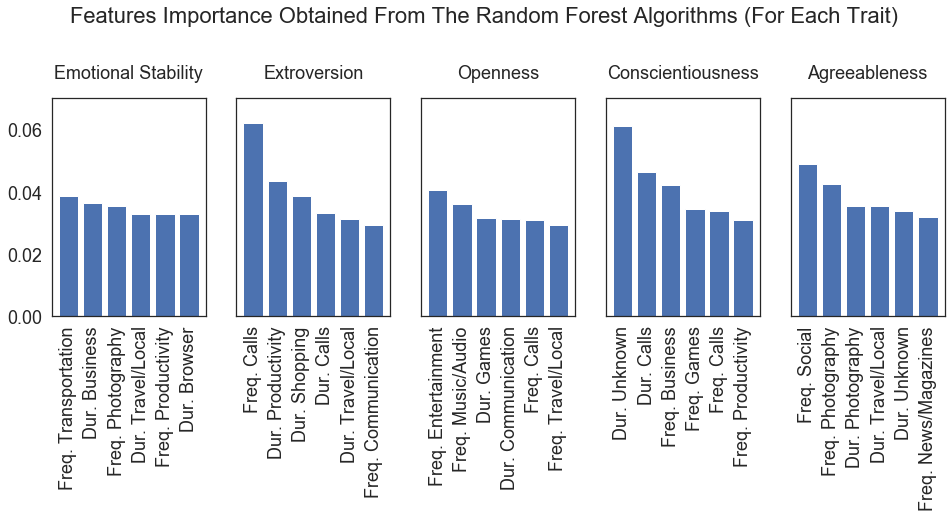

In [31]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(ncols=5,figsize=(16,4))
fig.suptitle('Features Importance Obtained From The Random Forest Algorithms (For Each Trait)',
             fontsize=22, y=1.20)
ax1.set_title("Emotional Stability", fontsize=18, pad=20)
ax2.set_title("Extroversion", fontsize=18, pad=20)
ax3.set_title("Openness", fontsize=18, pad=20)
ax4.set_title("Conscientiousness", fontsize=18, pad=20)
ax5.set_title("Agreeableness", fontsize=18, pad=20)

ax1.bar(data[0]['Features'], data[0]['Importance'])
ax1.set_ylim([0,0.07])
ax1.tick_params(labelsize=18)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.bar(data[1]['Features'], data[1]['Importance'])
ax2.set_ylim([0,0.07])
ax2.set_yticklabels([])
ax2.tick_params(labelsize=18)
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
ax3.bar(data[2]['Features'], data[2]['Importance'])
ax3.set_ylim([0,0.07])
ax3.set_yticklabels([])
ax3.tick_params(labelsize=18)
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)
ax4.bar(data[3]['Features'], data[3]['Importance'])
ax4.set_ylim([0,0.07])
ax4.set_yticklabels([])
ax4.tick_params(labelsize=18)
for tick in ax4.get_xticklabels():
    tick.set_rotation(90)
ax5.bar(data[4]['Features'], data[4]['Importance'])
ax5.set_ylim([0,0.07])
ax5.set_yticklabels([])
ax5.tick_params(labelsize=18)
for tick in ax5.get_xticklabels():
    tick.set_rotation(90)

fig.savefig('figures/random-forest-feature-importance', dpi=fig.dpi, bbox_inches="tight")

# Recursive Feature Elimination (RFE)

In [32]:
from sklearn.feature_selection import RFE

Logistic Regression

In [41]:
rfe_lr_clf = dict()
rfe_lr_clf['Emotional Stability'] = lr_clf_esta
rfe_lr_clf['Extraversion'] = lr_clf_extr
rfe_lr_clf['Openness'] = lr_clf_open
rfe_lr_clf['Conscientiousness'] = lr_clf_consc
rfe_lr_clf['Agreeableness'] = lr_clf_agr

rfe_rf = []
first = True
for key in rfe_lr_clf.keys():
    rfe = RFE(rfe_lr_clf[key], 5)
    rfe = rfe.fit(X, Y_all_traits[key])
    
    # summarize the selection of the attributes
    rfe = pd.DataFrame(data={'Trait': key,
                             'Features': X_labels,
                             'Support': rfe.support_,
                             'Ranking': rfe.ranking_})
    rfe = rfe.loc[rfe['Ranking'] == 1]
    if(first):
        first = False
        rfe_rf = rfe
    else:
        rfe_rf = pd.concat([rfe_rf, rfe])
        
rfe_rf.to_csv('results_RFE/RFE-LR.csv') 

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

Support Vector Machine (This algorithm does not provide feature importance)

K-Nearest Neighbor (This algorithm does not provide feature importance)

Linear Discriminant Analysis (This algorithm does not provide feature importance)

Random Forest 

In [37]:
rfe_rf_clf = dict()
rfe_rf_clf['Emotional Stability'] = rf_clf_esta
rfe_rf_clf['Extraversion'] = rf_clf_extr
rfe_rf_clf['Openness'] = rf_clf_open
rfe_rf_clf['Conscientiousness'] = rf_clf_consc
rfe_rf_clf['Agreeableness'] = rf_clf_agr

rfe_rf = []
first = True
for key in rfe_rf_clf.keys():
    rfe = RFE(rfe_rf_clf[key], 5)
    rfe = rfe.fit(X, Y_all_traits[key])
    
    # summarize the selection of the attributes
    rfe = pd.DataFrame(data={'Trait': key,
                             'Features': X_labels,
                             'Support': rfe.support_,
                             'Ranking': rfe.ranking_})
    rfe = rfe.loc[rfe['Ranking'] == 1]
    if(first):
        first = False
        rfe_rf = rfe
    else:
        rfe_rf = pd.concat([rfe_rf, rfe])

rfe_rf.to_csv('results_RFE/RFE-RF.csv') 

In [43]:
from sklearn.feature_selection import RFECV

rfe_rf_clf = dict()
rfe_rf_clf['Emotional Stability'] = rf_clf_esta
rfe_rf_clf['Extraversion'] = rf_clf_extr
rfe_rf_clf['Openness'] = rf_clf_open
rfe_rf_clf['Conscientiousness'] = rf_clf_consc
rfe_rf_clf['Agreeableness'] = rf_clf_agr

rfe_rf = []
first = True
for key in rfe_rf_clf.keys():
    rfe = RFECV(rfe_rf_clf[key], min_features_to_select=5, )
    rfe = rfe.fit(X, Y_all_traits[key])
    
    # summarize the selection of the attributes
    rfe = pd.DataFrame(data={'Trait': key,
                             'Features': X_labels,
                             'Support': rfe.support_,
                             'Ranking': rfe.ranking_})
    rfe = rfe.loc[rfe['Ranking'] == 1]
    if(first):
        first = False
        rfe_rf = rfe
    else:
        rfe_rf = pd.concat([rfe_rf, rfe])

rfe_rf.to_csv('results_RFE/RFECV-RF.csv') 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr

# Principal Component Analysis (PCA)

In [38]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=5, svd_solver='full')

# ELI5

In [82]:
from eli5 import show_weights, explain_weights, explain_weights_df
from sklearn.feature_extraction import DictVectorizer

Example

In [104]:
vec = DictVectorizer()

show_weights(lr_clf_extr,feature_names=X_labels,target_names=['Low','High'], top=10)

In [106]:
def eli5_explain_weights_for_clf(clfs, filePath):
    df_eli5 = None
    for key in clfs.keys():
        aux = explain_weights_df(clfs[key],feature_names=X_labels,target_names=['Low','High'], top=58)
        aux = aux[0:5]
        aux['trait'] = key
        df_eli5 = pd.concat([df_eli5, aux])
    df_eli5.to_csv(filePath)
    return df_eli5
df_eli5_lr = eli5_explain_weights_for_clf(clfs=rfe_lr_clf, filePath='results_RFE/ELI5_LR.csv')
df_eli5_rf = eli5_explain_weights_for_clf(clfs=rfe_rf_clf, filePath='results_RFE/ELI5_RF.csv')

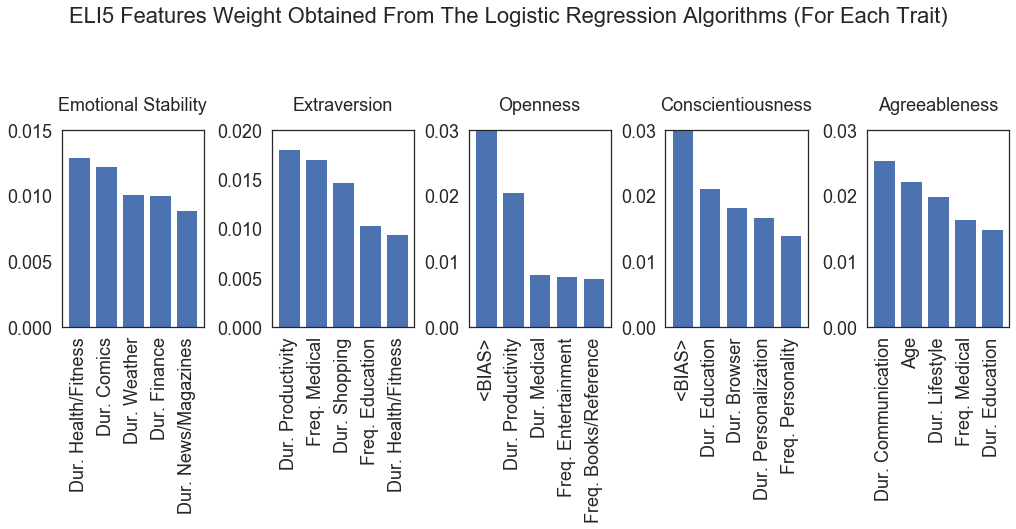

In [147]:
data = df_eli5_lr
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(ncols=5,figsize=(14,6), constrained_layout=True)
fig.suptitle('ELI5 Features Weight Obtained From The Logistic Regression Algorithms (For Each Trait)',
             fontsize=22, y=1.20)
ax1.set_title("Emotional Stability", fontsize=18, pad=20)
ax2.set_title("Extraversion", fontsize=18, pad=20)
ax3.set_title("Openness", fontsize=18, pad=20)
ax4.set_title("Conscientiousness", fontsize=18, pad=20)
ax5.set_title("Agreeableness", fontsize=18, pad=20)

ax1.bar(data[data['trait'] == 'Emotional Stability']['feature'], data[data['trait'] == 'Emotional Stability']['weight'])
ax1.set_ylim([0,0.015])
ax1.tick_params(labelsize=18)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.bar(data[data['trait'] == 'Extraversion']['feature'], data[data['trait'] == 'Extraversion']['weight'])
ax2.set_ylim([0,0.02])
#ax2.set_yticklabels([])
ax2.tick_params(labelsize=18)
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
ax3.bar(data[data['trait'] == 'Openness']['feature'], data[data['trait'] == 'Openness']['weight'])
ax3.set_ylim([0,0.03])
#ax3.set_yticklabels([])
ax3.tick_params(labelsize=18)
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)
ax4.bar(data[data['trait'] == 'Conscientiousness']['feature'], data[data['trait'] == 'Conscientiousness']['weight'])
ax4.set_ylim([0,0.03])
#ax4.set_yticklabels([])
ax4.tick_params(labelsize=18)
for tick in ax4.get_xticklabels():
    tick.set_rotation(90)
ax5.bar(data[data['trait'] == 'Agreeableness']['feature'], data[data['trait'] == 'Agreeableness']['weight'])
ax5.set_ylim([0,0.03])
#ax5.set_yticklabels([])
ax5.tick_params(labelsize=18)
for tick in ax5.get_xticklabels():
    tick.set_rotation(90)
    
fig.savefig('figures/ELI5-explain-weight-LR', dpi=fig.dpi, bbox_inches="tight")

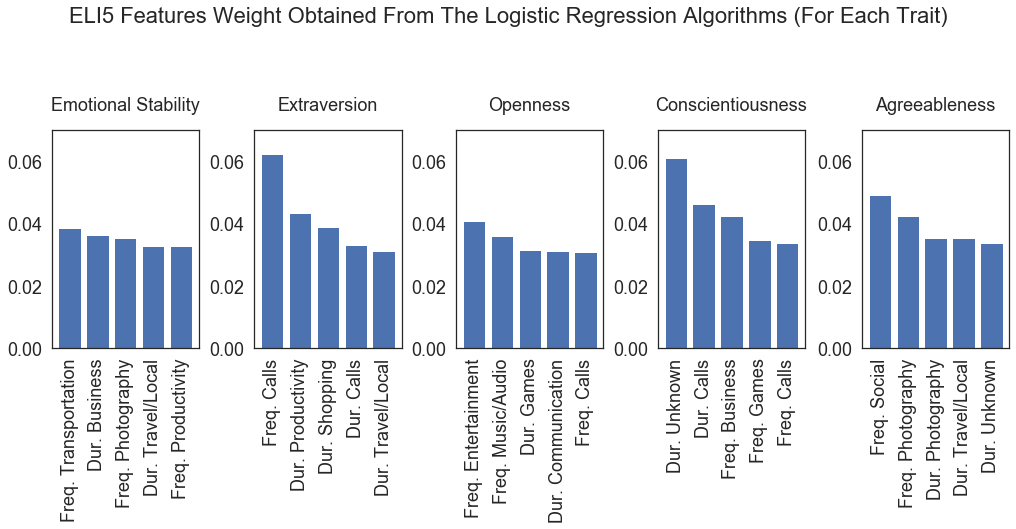

In [161]:
data = df_eli5_rf
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(ncols=5,figsize=(14,6), constrained_layout=True)
fig.suptitle('ELI5 Features Weight Obtained From The Logistic Regression Algorithms (For Each Trait)',
             fontsize=22, y=1.20)
ax1.set_title("Emotional Stability", fontsize=18, pad=20)
ax2.set_title("Extraversion", fontsize=18, pad=20)
ax3.set_title("Openness", fontsize=18, pad=20)
ax4.set_title("Conscientiousness", fontsize=18, pad=20)
ax5.set_title("Agreeableness", fontsize=18, pad=20)

ax1.bar(data[data['trait'] == 'Emotional Stability']['feature'], data[data['trait'] == 'Emotional Stability']['weight'])
ax1.set_ylim([0,0.07])
ax1.tick_params(labelsize=18)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.bar(data[data['trait'] == 'Extraversion']['feature'], data[data['trait'] == 'Extraversion']['weight'])
ax2.set_ylim([0,0.07])
#ax2.set_yticklabels([])
ax2.tick_params(labelsize=18)
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
ax3.bar(data[data['trait'] == 'Openness']['feature'], data[data['trait'] == 'Openness']['weight'])
ax3.set_ylim([0,0.07])
#ax3.set_yticklabels([])
ax3.tick_params(labelsize=18)
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)
ax4.bar(data[data['trait'] == 'Conscientiousness']['feature'], data[data['trait'] == 'Conscientiousness']['weight'])
ax4.set_ylim([0,0.07])
#ax4.set_yticklabels([])
ax4.tick_params(labelsize=18)
for tick in ax4.get_xticklabels():
    tick.set_rotation(90)
ax5.bar(data[data['trait'] == 'Agreeableness']['feature'], data[data['trait'] == 'Agreeableness']['weight'])
ax5.set_ylim([0,0.07])
#ax5.set_yticklabels([])
ax5.tick_params(labelsize=18)
for tick in ax5.get_xticklabels():
    tick.set_rotation(90)
    
fig.savefig('figures/ELI5-explain-weight-RF', dpi=fig.dpi, bbox_inches="tight")